# CWUR Times Series Analysis

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler # Importing StandardScaler for standardizing data

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 6\World University Rankings Analysis'

In [4]:
# Import dataset

df_cwur = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cwur_top200.csv'))

## 2. Data Cleaning, Manipulations, and Preprocessing

##### Removing irrelevant columns

In [6]:
# Drop index column

df_cwur = df_cwur.drop(columns = ['Unnamed: 0'])

In [7]:
df_cwur

,world_rank_CWUR,university_name,country,national_rank,quality_of_education_rank,alumni_employment_rank,quality_of_faculty_rank,publications_rank,influence_rank,citations_rank,broad_impact_rank,patents_rank,overall_score_CWUR,year
0,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,United States of America,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,United States of America,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,United States of America,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,196,University of Kansas,United States of America,85,228,91,218,212,161,161,235.0,127,47.52,2015
596,197,University of Cologne,Germany,12,367,132,201,204,138,146,161.0,421,47.52,2015
597,198,University of Georgia,United States of America,86,93,188,172,181,132,234,256.0,82,47.50,2015
598,199,University of Liverpool,United Kingdom,15,176,179,207,154,172,128,174.0,377,47.49,2015


In [8]:
# Create a column and set the default value to 'January'

df_cwur['month'] = 'January'

df_cwur

,world_rank_CWUR,university_name,country,national_rank,quality_of_education_rank,alumni_employment_rank,quality_of_faculty_rank,publications_rank,influence_rank,citations_rank,broad_impact_rank,patents_rank,overall_score_CWUR,year,month
0,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.00,2012,January
1,2,Massachusetts Institute of Technology,United States of America,2,9,17,3,12,4,4,NaN,1,91.67,2012,January
2,3,Stanford University,United States of America,3,17,11,5,4,2,2,NaN,15,89.50,2012,January
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,January
4,5,California Institute of Technology,United States of America,4,2,29,7,37,22,22,NaN,18,85.21,2012,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,196,University of Kansas,United States of America,85,228,91,218,212,161,161,235.0,127,47.52,2015,January
596,197,University of Cologne,Germany,12,367,132,201,204,138,146,161.0,421,47.52,2015,January
597,198,University of Georgia,United States of America,86,93,188,172,181,132,234,256.0,82,47.50,2015,January
598,199,University of Liverpool,United Kingdom,15,176,179,207,154,172,128,174.0,377,47.49,2015,January


In [10]:
# Duplicate each row 12 times
# Check if correct (original df was 1201 rows --> duplicating each row 12 times should lead to a df with 14412 rows)

newdf = pd.DataFrame(np.repeat(df_cwur.values, 12, axis=0))
newdf.columns = df_cwur.columns

newdf

,world_rank_CWUR,university_name,country,national_rank,quality_of_education_rank,alumni_employment_rank,quality_of_faculty_rank,publications_rank,influence_rank,citations_rank,broad_impact_rank,patents_rank,overall_score_CWUR,year,month
0,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.0,2012,January
1,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.0,2012,January
2,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.0,2012,January
3,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.0,2012,January
4,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.0,2012,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,200,University of Bern,Switzerland,7,184,526,213,163,128,93,159.0,433,47.49,2015,January
7196,200,University of Bern,Switzerland,7,184,526,213,163,128,93,159.0,433,47.49,2015,January
7197,200,University of Bern,Switzerland,7,184,526,213,163,128,93,159.0,433,47.49,2015,January
7198,200,University of Bern,Switzerland,7,184,526,213,163,128,93,159.0,433,47.49,2015,January


In [11]:
# Replace the 'month' value in every row aside from the original row to 'February'

newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'February'

newdf

,world_rank_CWUR,university_name,country,national_rank,quality_of_education_rank,alumni_employment_rank,quality_of_faculty_rank,publications_rank,influence_rank,citations_rank,broad_impact_rank,patents_rank,overall_score_CWUR,year,month
0,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.0,2012,January
1,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.0,2012,February
2,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.0,2012,February
3,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.0,2012,February
4,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.0,2012,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,200,University of Bern,Switzerland,7,184,526,213,163,128,93,159.0,433,47.49,2015,February
7196,200,University of Bern,Switzerland,7,184,526,213,163,128,93,159.0,433,47.49,2015,February
7197,200,University of Bern,Switzerland,7,184,526,213,163,128,93,159.0,433,47.49,2015,February
7198,200,University of Bern,Switzerland,7,184,526,213,163,128,93,159.0,433,47.49,2015,February


In [12]:
newdf['month'].value_counts(dropna = False)

February    6600
January      600
Name: month, dtype: int64

In [13]:
# Replace the months sequentially with March, April, May, etc. 

newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'March'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'April'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'May'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'June'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'July'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'August'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'September'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'October'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'November'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'December'

newdf

,world_rank_CWUR,university_name,country,national_rank,quality_of_education_rank,alumni_employment_rank,quality_of_faculty_rank,publications_rank,influence_rank,citations_rank,broad_impact_rank,patents_rank,overall_score_CWUR,year,month
0,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.0,2012,January
1,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.0,2012,February
2,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.0,2012,March
3,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.0,2012,April
4,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.0,2012,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,200,University of Bern,Switzerland,7,184,526,213,163,128,93,159.0,433,47.49,2015,August
7196,200,University of Bern,Switzerland,7,184,526,213,163,128,93,159.0,433,47.49,2015,September
7197,200,University of Bern,Switzerland,7,184,526,213,163,128,93,159.0,433,47.49,2015,October
7198,200,University of Bern,Switzerland,7,184,526,213,163,128,93,159.0,433,47.49,2015,November


In [14]:
#Check if each month has the original amount of rows

newdf['month'].value_counts(dropna = False)

January      600
February     600
March        600
April        600
May          600
June         600
July         600
August       600
September    600
October      600
November     600
December     600
Name: month, dtype: int64

In [15]:
# Create a subset with only relevant numerical columns, grouped by 'year' and 'country' columns first

newdf_sub1 = newdf.groupby(['year', 'month', 'country'], as_index=False)[['world_rank_CWUR', 
                                                                          'quality_of_education_rank',
                                                                          'alumni_employment_rank',
                                                                          'quality_of_faculty_rank',
                                                                          'publications_rank',
                                                                          'influence_rank',
                                                                          'citations_rank',
                                                                          'broad_impact_rank',
                                                                          'patents_rank']].mean()

In [16]:
newdf_sub1.head()

,year,month,country,world_rank_CWUR,quality_of_education_rank,alumni_employment_rank,quality_of_faculty_rank,publications_rank,influence_rank,citations_rank,broad_impact_rank,patents_rank
0,2012,April,Australia,93.000000,101.000000,101.000000,101.000000,61.500000,91.000000,87.000000,NaN,57.5
1,2012,April,Canada,47.666667,90.666667,97.666667,60.333333,22.666667,30.333333,37.666667,NaN,101.0
2,2012,April,Denmark,93.000000,101.000000,101.000000,60.000000,85.000000,66.000000,101.000000,NaN,101.0
3,2012,April,Finland,89.000000,96.000000,101.000000,79.000000,62.000000,64.000000,54.000000,NaN,101.0
4,2012,April,France,65.200000,39.200000,54.000000,77.600000,82.400000,90.400000,96.400000,NaN,101.0


In [17]:
newdf_sub1.shape

(1032, 12)

In [19]:
# Create a further subset that just includes the year, country, and world ranking columns

newdf_sub1 = newdf_sub1[['year', 'month', 'country', 'world_rank_CWUR']]

In [20]:
# Create a subset that only includes universities from the USA

newdf_sub1_USA = newdf_sub1.loc[newdf_sub1['country'] == 'United States of America']

newdf_sub1_USA

,year,month,country,world_rank_CWUR
15,2012,April,United States of America,42.396552
31,2012,August,United States of America,42.396552
47,2012,December,United States of America,42.396552
63,2012,February,United States of America,42.396552
79,2012,January,United States of America,42.396552
95,2012,July,United States of America,42.396552
111,2012,June,United States of America,42.396552
127,2012,March,United States of America,42.396552
143,2012,May,United States of America,42.396552
159,2012,November,United States of America,42.396552


In [21]:
# Drop the 'country' column since it is unnecessary now

newdf_sub1_USA = newdf_sub1_USA.drop(columns = ['country'])

In [22]:
# Set the "year" column as the index

from datetime import date

newdf_sub1_USA['datetime'] = pd.to_datetime(newdf_sub1_USA['year'].astype(str)  + newdf_sub1_USA['month'], format='%Y%B') # Create a datetime column from "year.""
newdf_sub1_USA = newdf_sub1_USA.set_index('datetime') # Set the datetime as the index of the dataframe.
newdf_sub1_USA.drop(['year', 'month'], axis=1, inplace=True) # Drop the "month" and "year" column.
newdf_sub1_USA.head()

,world_rank_CWUR
datetime,
2012-04-01,42.396552
2012-08-01,42.396552
2012-12-01,42.396552
2012-02-01,42.396552
2012-01-01,42.396552


In [23]:
# Sort the datetime column numerically

newdf_sub1_USA = newdf_sub1_USA.sort_values('datetime')

In [24]:
newdf_sub1_USA

,world_rank_CWUR
datetime,
2012-01-01,42.396552
2012-02-01,42.396552
2012-03-01,42.396552
2012-04-01,42.396552
2012-05-01,42.396552
2012-06-01,42.396552
2012-07-01,42.396552
2012-08-01,42.396552
2012-09-01,42.396552


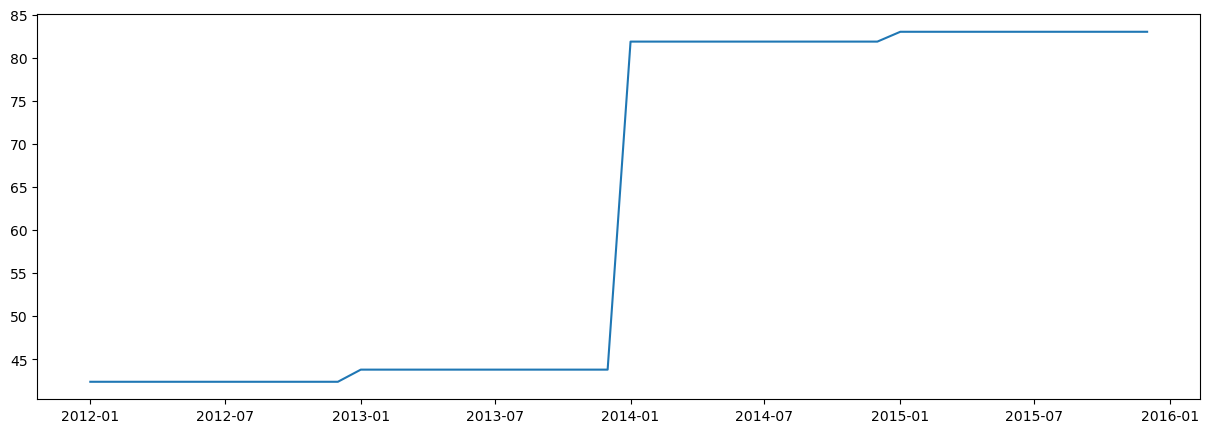

In [25]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(newdf_sub1_USA)

In [26]:
# Export the aggregate dataframe of world rankings since it could possibly be useful in the future

newdf.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cwur_top200_monthsmanipulated.csv'))